# TMDB Explorartory Data Analysis

In [1]:
# Importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
# Getting the dataset

df = pd.read_csv('TMDB_movies.csv')

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df.shape # Checking the shape

(4803, 20)

In [4]:
df.drop_duplicates(keep = 'last').shape # Checking if the shape matches after dropping duplicates

(4803, 20)

In [5]:
df.isnull().sum() # Checking how many columns have nulls

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
# Dropping nulls with low counts

df.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = ['overview', 'release_date', 'runtime'],   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)

In [7]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [8]:
# Checking how many budgets are 0

len(df.loc[df.budget == 0][['title', 'budget']])

1036

In [9]:
# Managers Code

def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Genres
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [11]:
# Extracting the year from the release date

df['year'] = df['release_date'].str.extract('(\d{4})')

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/3798028810.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['year'] = df['release_date'].str.extract('(\d{4})')


In [12]:
df.loc[df.year == '2017'][['title', 'year']]

,title,year
4255,Growing Up Smith,2017


In [13]:
# Dropping the only movie made in 2017

df.drop(4255, inplace = True)

# Revenue and Popularity
* **Why?**
> The long term aim is make a movie recommendation system\
then it's best to explore the most popular movies so customers can enjoy\
and the movies that make the most money, to maximise profit.

In [14]:
# Getting the average revenue for each year

top_year_rev = df.groupby('year')[['revenue']].mean().sort_values('year', ascending = False).head(17)

/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/2429311468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = top_year_rev,


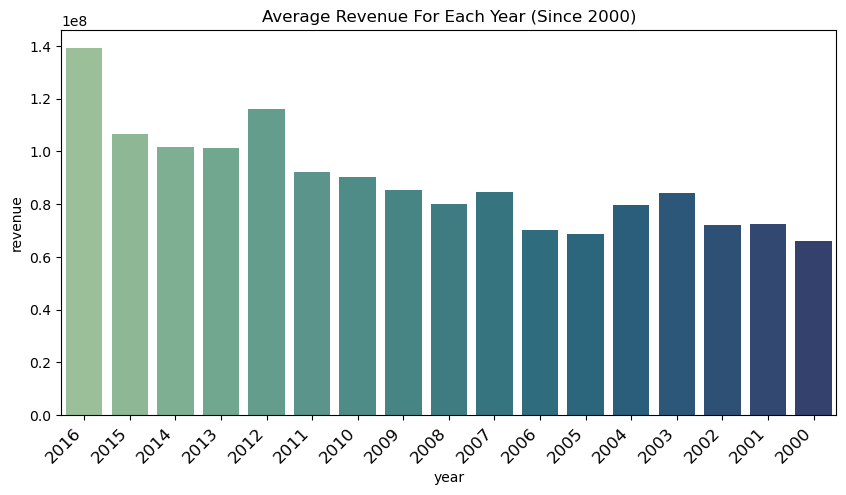

In [15]:
plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot( data = top_year_rev,
             x = 'year',
             y = 'revenue',
             palette = 'crest' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Average Revenue For Each Year (Since 2000)') # naming the plot

# plt.savefig('AvgRevYear.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

In [16]:
# Getting the average popularity for each year

top_year_pop = df.groupby('year')[['popularity']].mean().sort_values('year', ascending = False).head(17)

/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/4221734761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = top_year_pop,


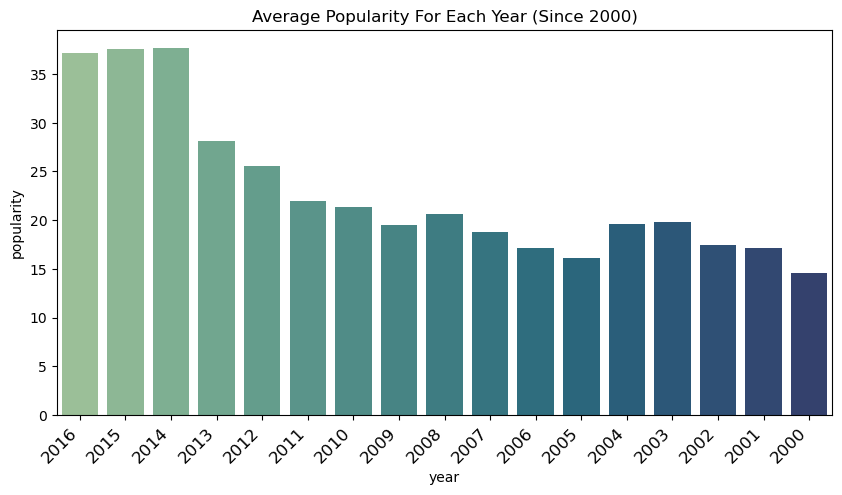

In [17]:
plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot( data = top_year_pop,
             x = 'year',
             y = 'popularity',
             palette = 'crest' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Average Popularity For Each Year (Since 2000)') # naming the plot

# plt.savefig('AvgPopYear.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

# Average Revenue and Average Popularity per Year

<div class = "row" style = "display: table;"
  display: table;>
    <div class = "column" style = "float: left; padding: 5px;">
        <img src = 'https://raw.githubusercontent.com/Saka1111/EDA/refs/heads/main/AvgRevYear.png' height = 500px width = 450px>
    </div>
    <div class = "column" style = "float: left; padding: 5px;">
        <img src = 'https://raw.githubusercontent.com/Saka1111/EDA/refs/heads/main/AvgPopYear.png' height = 500px width = 450px>
    </div>
</div>
<p style = "text-align: center"><b>Overtime, both revenue and popularity increased throughout the millennium
so we know that movies are continuously making money and they still have demand from customers</b></p>
<br>

## Genres
<p style = "text-align: center;">Looking deeper, the different genres can be used to analyse which ones make the most revenue and which ones are the most popular</p>

In [19]:
# Extracting the different genres for each movie

df_genres = df.explode('extracted_genres')[['extracted_genres', 'title', 'popularity', 'revenue', 'year']].copy()

In [20]:
df_genres.head(20)

,extracted_genres,title,popularity,revenue,year
0,Action,Avatar,150.437577,2787965087,2009
0,Adventure,Avatar,150.437577,2787965087,2009
0,Fantasy,Avatar,150.437577,2787965087,2009
0,Science Fiction,Avatar,150.437577,2787965087,2009
1,Adventure,Pirates of the Caribbean: At World's End,139.082615,961000000,2007
1,Fantasy,Pirates of the Caribbean: At World's End,139.082615,961000000,2007
1,Action,Pirates of the Caribbean: At World's End,139.082615,961000000,2007
2,Action,Spectre,107.376788,880674609,2015
2,Adventure,Spectre,107.376788,880674609,2015
2,Crime,Spectre,107.376788,880674609,2015


In [21]:
# Top genres by average revenue

top_gen_rev = df_genres.groupby('extracted_genres')[['revenue']].mean().sort_values('revenue', ascending = False)

/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/1276161769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = top_gen_rev,


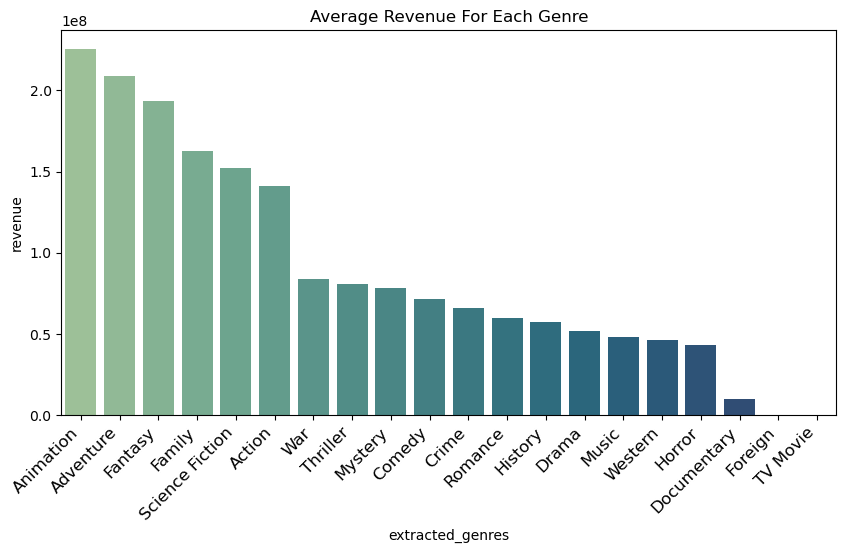

In [22]:
plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot( data = top_gen_rev,
             x = 'extracted_genres',
             y = 'revenue',
             palette = 'crest' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Average Revenue For Each Genre') # naming the plot

# plt.savefig('AvgRevGen.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

In [23]:
# Top genres by average popularity

top_gen_pop = df_genres.groupby('extracted_genres')[['popularity']].mean().sort_values('popularity', ascending = False)

/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/2258292616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = top_gen_pop,


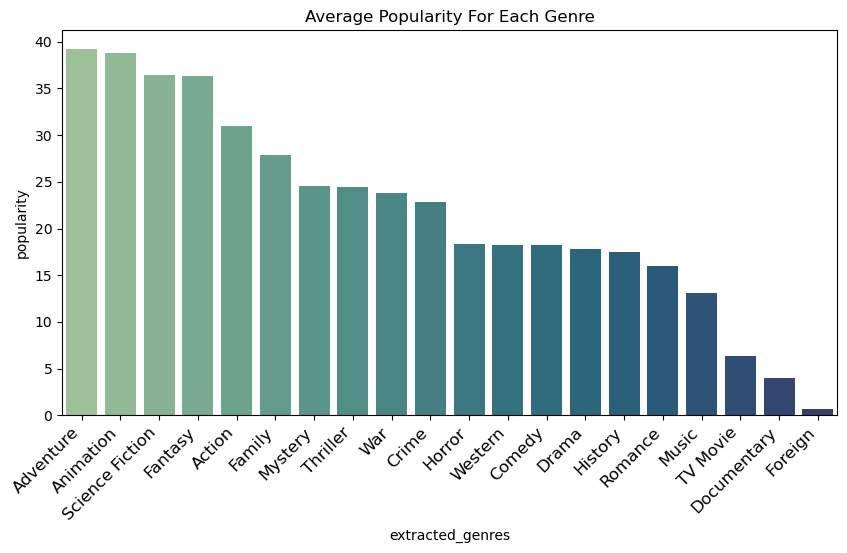

In [24]:
plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot( data = top_gen_pop,
             x = 'extracted_genres',
             y = 'popularity',
             palette = 'crest' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Average Popularity For Each Genre') # naming the plot

# plt.savefig('AvgPopGen.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

# Highest Revenue and Most Popular Genres

<div class = "row" style = "display: table;">
    <div class = "column" style = "float: left; padding: 5px;">
        <img src = 'https://raw.githubusercontent.com/Saka1111/EDA/refs/heads/main/AvgRevGen.png' height = 500px width = 475px>
    </div>
    <div class = "column" style = "float: left; padding: 5px;">
        <img src = 'https://raw.githubusercontent.com/Saka1111/EDA/refs/heads/main/AvgPopGen.png' height = 500px width = 475px>
    </div>
</div>
<div style = "text-align: center;">
    <h3>Top Genres by revenue:</h3>
    <h3><b>Animation, Adventure, Fantasy</b></h3>
    <h3>Top Genres by popularity:</h3>
    <h3><b>Animation, Adventure, Science Fiction</b></h3>
</div>

# Movies
<p style = "text-align: center">More specifically, the different movies can be used to see what makes the most money and what is the most popular</p>

In [25]:
top_10_rev = df.sort_values('revenue', ascending = False).head(10).copy()

/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/4104752918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = top_10_rev,


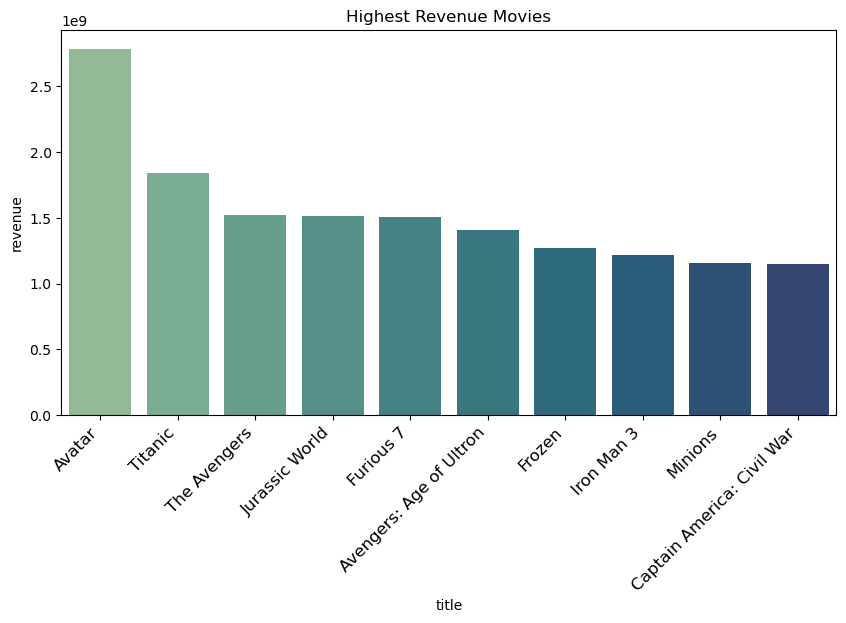

In [28]:
plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot( data = top_10_rev,
             x = 'title',
             y = 'revenue',
             palette = 'crest' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Highest Revenue Movies') # naming the plot

# plt.savefig('Top10MovieRev.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

In [27]:
top_10_pop = df[['title', 'popularity']].sort_values('popularity', ascending = False).head(10).copy()

/var/folders/nn/b6p7_ncj4zn9kb5k0qsj4hxm0000gn/T/ipykernel_20705/3048660742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = top_10_pop,


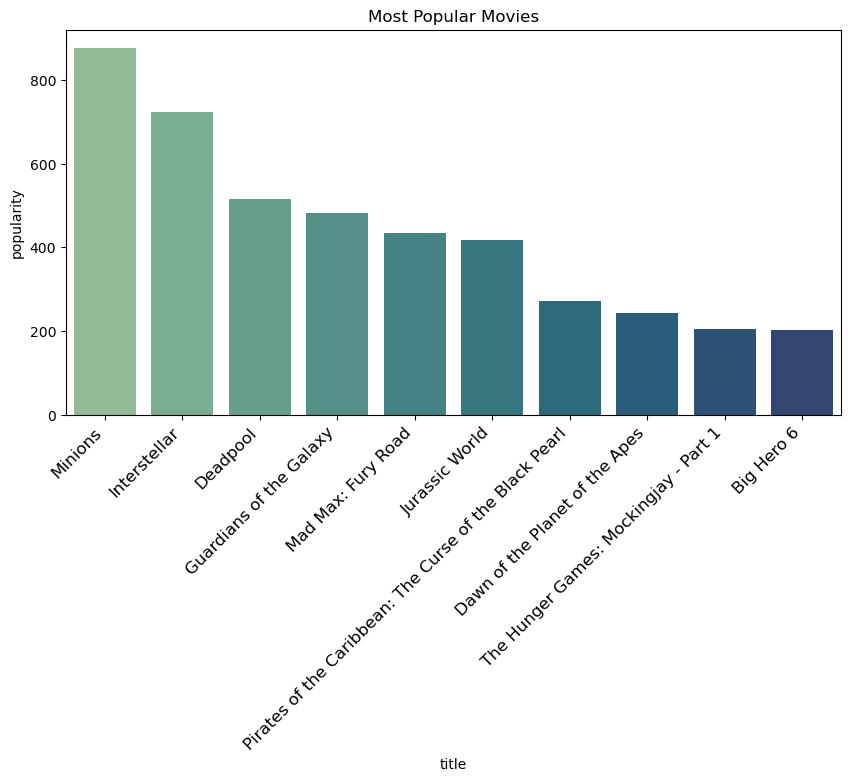

In [29]:
plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot( data = top_10_pop,
             x = 'title',
             y = 'popularity',
             palette = 'crest' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Most Popular Movies') # naming the plot

# plt.savefig('Top10MoviePop.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

plt.show()

# Highest Revenue and Most Popular Movies

<div class = "row" style = "display: table;">
    <div class = "column" style = "float: left; padding: 5px;">
        <img src = 'https://raw.githubusercontent.com/Saka1111/EDA/refs/heads/main/Top10MovieRev.png' height = 500px width = 475px>
    </div>
    <div class = "column" style = "float: left; padding: 5px;">
        <img src = 'https://raw.githubusercontent.com/Saka1111/EDA/refs/heads/main/Top10MoviePop.png' height = 500px width = 475px>
    </div>
</div>
<div style = "text-align: center;">
    <h3>Top Movies by revenue:</h3>
    <h3><b>Avatar, Titanic, The Avengers</b></h3>
    <h3>Top Movies by popularity:</h3>
    <h3><b>Minions, Interstellar, Deadpool</b></h3>
</div>

# Movie and Genre Connection

|Movie|Genre|
|---|---|
|Avatar|Action, **Adventure**, Fantasy, **Science Fiction**|
|Titanic|Drama, Romance, Thriller|
|The Avengers|**Science Fiction**, Action, **Adventure**|
|Minions|Family, **Animation**, **Adventure**, Comedy|
|Interstellar|**Adventure**, Drama, **Science Fiction**|
|Deadpool|Action, **Adventure**, Comedy|

<br>
<p style = "text-align: center;"><b>These movies score high in revenue and popularity because they are part of the top genres</b></p>

## Movie Comparison (or Genre)
* Compare best and worst movies by popularity
* Compare best and worst movies by revenue